In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import cmath

In [2]:
def n_0(a):
    return 2*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))), 0, np.inf)[0]
n_0 = np.vectorize(n_0)
def n_2(a):
    return 2*integrate.quad(lambda x: np.exp(-x**2)*x**2/((np.exp(-x**2)+np.exp(-a))), 0, np.inf)[0]
n_2 = np.vectorize(n_2)
def Cauchy(z,a):
    s=integrate.quad(lambda x: np.exp(-x**2)*(x-z.real)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf, np.inf)[0]
    s=s+1j*z.imag*integrate.quad(lambda x: np.exp(-x**2)/((np.exp(-x**2)+np.exp(-a))*((x-z.real)**2+z.imag**2)), -np.inf,  np.inf)[0]
    return s/n_0(a)


I = np.vectorize(Cauchy)

def lambda_z(w, v, z, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    return (1-(B*z**2)/A**2-z*B*(z**2-A/B)*I(z, a)/A**2)


In [5]:
def Cauchy1(z,a):
    eps=1e-10
    s=integrate.quad(lambda x: np.exp(-x**2)/((x-z)*(np.exp(-x**2)+np.exp(-a))), -np.inf, z.real-eps)[0]
    s=s+integrate.quad(lambda x: np.exp(-x**2)/((x-z)*(np.exp(-x**2)+np.exp(-a))), z.real+eps,  np.inf)[0]
    return s/n_0(a)
def I1(z,a):
    if -15<=z<=15:
        s=Cauchy1(z,a)
    else:
        s=-1/z
    return s
I1 =np.vectorize(I1)
def lambda_z_plus(w, v, z, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    return (1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z,a)/A**2)-np.pi*1j*z*B*(z**2-A/B)*(np.exp(-z**2)/(np.exp(-z**2)+np.exp(-a)))/(n_0(a)*A**2)
def lambda_z_minus(w, v, z,a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    return (1-(B*z**2)/A**2-z*B*(z**2-A/B)*I1(z,a)/A**2)+np.pi*1j*z*B*(z**2-A/B)*(np.exp(-z**2)/(np.exp(-z**2)+np.exp(-a)))/(n_0(a)*A**2)
lambda_z_minus=np.vectorize(lambda_z_minus)
lambda_z_plus=np.vectorize(lambda_z_plus)

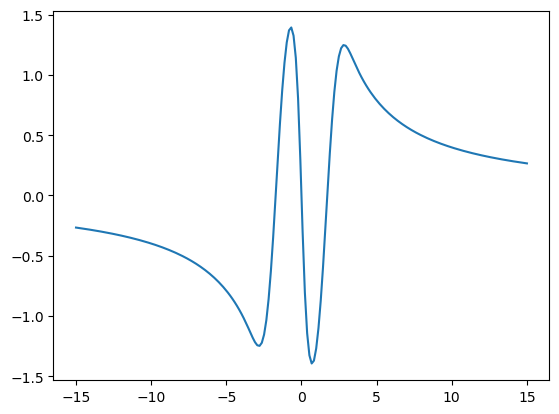

In [6]:
w=0.5
v=0.001
def y(w,v,t,a):
    return cmath.log((((t+1j)/(t-1j))**2)*lambda_z_plus(w, v, t, a)/lambda_z_minus(w, v, t,a)).imag
y=np.vectorize(y)
x=np.linspace(-15, 15,  200)
plt.plot(x,y(w,v,x,2))

In [7]:
def Gamma(w, v, z, a):
    s=1j*integrate.quad(lambda x: (x-z.real)*y(w,v,x,a)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    s=s-z.imag*integrate.quad(lambda x: y(w,v,x,a)/((x-z.real)**2+z.imag**2), -np.inf, np.inf)[0]
    return s/(2*np.pi*1j)
gamma=np.vectorize(Gamma)
#gamma(0.5, 0.001, 1j, 1)

In [12]:
def root(w, v, z, a):
    B=n_0(a)/(n_2(a)*v**2)
    A=1-1j*w/v
    lambda_inf=1-1/A+1/(A*v)**2
    #print(lambda_inf)
    return cmath.sqrt(z**2-(lambda_z(w,v,z,a)*(z+1j)**2)/(cmath.exp(gamma(w,v,z,a))*lambda_inf))
root=np.vectorize(root)


In [16]:
q=root(0.5, 0.001, 1j, 1)

In [18]:
lambda_z(0.5, 0.001, 0.00150365-0.64142307j ,1)

(-9.353112802035213e-07-9.908770156222442e-05j)

In [17]:
lambda_z(0.5, 0.001, q ,1)

(-9.297109007100346e-07-9.908962590145058e-05j)